## Performance Trends in Employee Agents Management (Flag 14)

### Dataset Description

The dataset comprises two key tables simulating ServiceNow platform: the `sys_user` table and the `incidents` table, each with 500 entries. The `incidents` table focuses on detailing various attributes such as category, state, open and close dates, involved personnel, and incident specifics like location, description, and priority. It effectively captures incident management activities with fields including 'opened_at', 'closed_at', 'assigned_to', 'short_description', and 'priority', reflecting the operational handling and urgency of issues across different locations and categories. The `sys_user` table, on the other hand, contains user-related information, focusing on the details of employees or system users. This includes fields such as 'user_id', 'name', 'role', 'email', 'schedule', and 'department', providing insights into the user profiles managed within the ServiceNow system. Together, these tables are instrumental in understanding the workflow, user involvement and detailed tracking of incident resolution processes within an organization.


### Your Task
**Goal**: Given the user and incidents tabular data, analyze discrepancies in the performance of human agents, particularly focusing on a certain human agent, to understand the underlying causes of performance dips and devise strategies to manage workload during absence periods.

**Role**: Team Lead

**Difficulty**: 4 out of 5. This task requires comprehensive data analysis to identify performance trends and their correlations with operational factors, merging information from two tables, demanding advanced analytical skills and regression analysis.

**Category**: User Management


## Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [1]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range
from pandas import Timestamp

### Load User Agent Dataset
This cell loads user agent dataset used in the analysis. The dataset is stored in a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.


In [2]:
user_dataset_path = "csvs/flag-14-sysuser.csv"
df_usr = pd.read_csv(user_dataset_path)
df_usr.head()

,sys_id,schedule,manager,phone,user_name,name,location,department,title,email
0,46b87022a9fe198101a78787e40d7547,NaN,NaN,NaN,charlie.whitherspoon,Charlie Whitherspoon,"945 South Birch Street, Glendale,CO",Sales,NaN,charlie.whitherspoon@example.com
1,46ca0887a9fe19810191e08e51927ebf,NaN,NaN,NaN,howard.johnson,Howard Johnson,"601 College Street, Clarksville,TN",Sales,NaN,howard.johnson@example.com
2,46d44a23a9fe19810012d100cca80666,NaN,NaN,NaN,beth.anglin,Beth Anglin,"6304 Northwest Barry Road, Kansas City,MO",Sales,NaN,beth.anglin@example.com
3,46d96f57a9fe198101947a9620895886,NaN,NaN,NaN,luke.wilson,Luke Wilson,"322 West 52nd Street, New York,NY",Sales,NaN,luke.wilson@example.com
4,5137153cc611227c000bbd1bd8cd2005,"[(Timestamp('2023-06-01 00:00:00'), Timestamp(...",NaN,NaN,fred.luddy,Fred Luddy,"650 Dennery Road #102, San Diego,CA",Development,Programmer,fred.luddy@example.com


### Load Incidents Dataset
This cell loads the second dataset used in the analysis. The dataset is stored in a CSV file and is loaded into a DataFrame. This step includes reading the data from a file path and possibly performing initial observations such as viewing the first few rows to ensure it has loaded correctly.


In [3]:
dataset_path = "csvs/flag-14.csv"
df = pd.read_csv(dataset_path)
df.head()


,closed_by,assigned_to,opened_at,caller_id,sys_updated_by,number,sys_updated_on,closed_at,state,short_description,assignment_group,priority,category
0,Fred Luddy,Fred Luddy,2023-01-02 01:07:00,David Loo,admin,INC0000000000,2023-01-13 11:56:32.487389404,2023-01-13 11:56:32.487389404,Resolved,Email server response delay issue,Network,2 - High,Network
1,Beth Anglin,Luke Wilson,2023-01-02 16:33:00,David Loo,employee,INC0000000001,2023-01-08 03:06:22.546255407,2023-01-08 03:06:22.546255407,Resolved,Email system outage affecting entire office,Service Desk,1 - Critical,Network
2,Luke Wilson,Luke Wilson,2023-01-03 11:20:00,ITIL User,admin,INC0000000002,2023-01-07 23:30:04.341934899,2023-01-07 23:30:04.341934899,Resolved,Email system outage reported by several users,Service Desk,1 - Critical,Software
3,Luke Wilson,Beth Anglin,2023-01-03 17:12:00,ITIL User,system,INC0000000003,2023-01-11 16:14:04.414115803,2023-01-11 16:14:04.414115803,Resolved,Email server outage impacting department,Network,1 - Critical,Network
4,Fred Luddy,Charlie Whitherspoon,2023-01-04 11:30:00,Don Goodliffe,system,INC0000000004,2023-01-19 03:20:15.609583000,2023-01-19 03:20:15.609583000,Resolved,Email system delay causing disruptions,Service Desk,2 - High,Software


### **Question 1: What is the overall average Time to Resolution (TTR) for all agents over the recent period?**

#### Plot average resolution time by Agent
This cell creates a bar plot to visualize the average Time to Resolution (TTR) for incidents handled by each agent over the recent period. By examining this average resolution times, the plot provides insights into the efficiency and effectiveness of each agent in resolving incidents. This information could be crucial for assessing performance disparitiese.

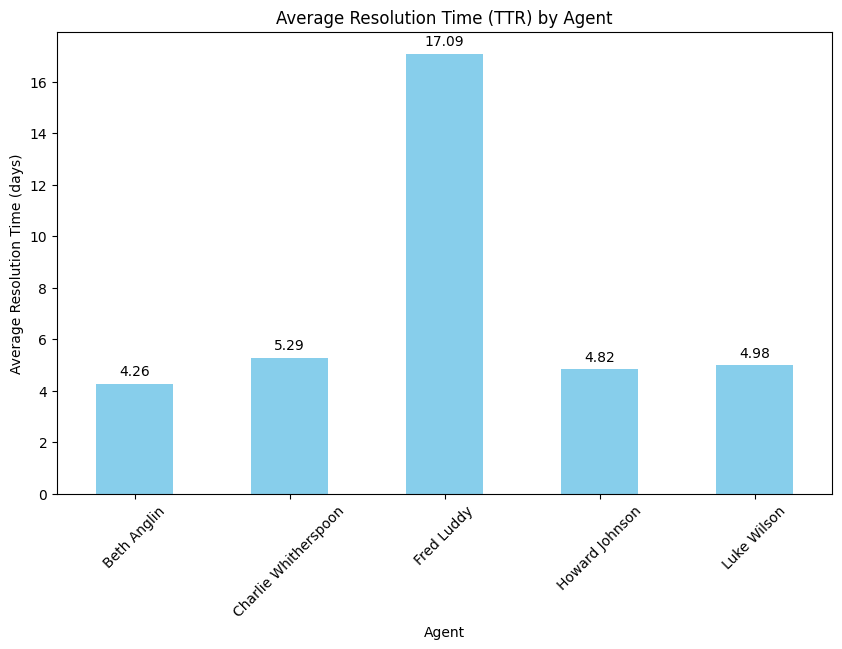

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming dataset_path is defined and points to the correct CSV file
df = pd.read_csv(dataset_path)

# Convert opened_at and closed_at to datetime
df["opened_at"] = pd.to_datetime(df["opened_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])

# Compute TTR in days
df["resolution_time"] = (df["closed_at"] - df["opened_at"]).dt.total_seconds() / 86400

# Group by 'assigned_to' and compute the average resolution time for each agent
avg_ttr_by_agent = df.groupby("assigned_to")["resolution_time"].mean()

# Plotting the average TTR of each agent as a histogram
ax = avg_ttr_by_agent.plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title("Average Resolution Time (TTR) by Agent")
plt.xlabel("Agent")
plt.ylabel("Average Resolution Time (days)")
plt.xticks(rotation=45)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

#### Generate JSON Description for the Insight

In [5]:
{
    "data_type": "descriptive",
    "insight": "Fred Luddy has a significantly higher average TTR compared to other agents",
    "insight_value": {
        "x_val": "Fred Luddy", 
        "y_val": 17.09
    },
    "plot": {
        "plot_type": "histogram",
        "title": "Average Time to Resolution (TTR) by Agent",
        "x_axis": {
            "name": "Agent",
            "value": ["Beth Anglin", "Charlie Whitherspoon", "Fred Luddy", "Howard Johnson", "Luke Wilson"],
            "description": "This represents the different agents assigned to resolve incidents."
        },
        "y_axis": {
            "name": "Average Resolution Time (days)",
            "value": [4.26, 5.29, 17.09, 4.82, 4.98],
            "description": "This represents the average time each agent takes to resolve incidents, measured in days."
        },
        "description": "The histogram displays the average resolution time for each agent. Each bar represents an agent and the height of the bar corresponds to the average time taken to resolve incidents. The values are annotated on each bar. Fred Luddy's bar is noticeably higher, indicating a longer average resolution time compared to his peers."
    },
    "question": "What is the average TTR of each agent as a histogram?",
    "actionable_insight": "Given that Fred Luddy's average TTR is significantly higher than his peers, it may be beneficial to investigate the specific reasons behind this anomaly. Possible actions include reviewing the complexity of incidents assigned to him, checking for any personal or systemic issues during his shifts, or providing additional support or training to help him manage his workload more efficiently."
}

{'data_type': 'descriptive',
 'insight': 'Fred Luddy has a significantly higher average TTR compared to other agents',
 'insight_value': {'x_val': 'Fred Luddy', 'y_val': 17.09},
 'plot': {'plot_type': 'histogram',
  'title': 'Average Time to Resolution (TTR) by Agent',
  'x_axis': {'name': 'Agent',
   'value': ['Beth Anglin',
    'Charlie Whitherspoon',
    'Fred Luddy',
    'Howard Johnson',
    'Luke Wilson'],
   'description': 'This represents the different agents assigned to resolve incidents.'},
  'y_axis': {'name': 'Average Resolution Time (days)',
   'value': [4.26, 5.29, 17.09, 4.82, 4.98],
   'description': 'This represents the average time each agent takes to resolve incidents, measured in days.'},
  'description': "The histogram displays the average resolution time for each agent. Each bar represents an agent and the height of the bar corresponds to the average time taken to resolve incidents. The values are annotated on each bar. Fred Luddy's bar is noticeably higher, indic

### **Question 2: How does the TTR of the specific agent compare to other agents during the same time frame?**


#### Plot average resolution time by agent over time
This cell creates a line plot to visualize the average Time to Resolution (TTR) for each agent over time, segmented by month and year. This visualization allows for  detailed comparison of how different agents perform in resolving incidents within the same time, providing insights into consistency, and potential areas where specific agents may require some additional support.

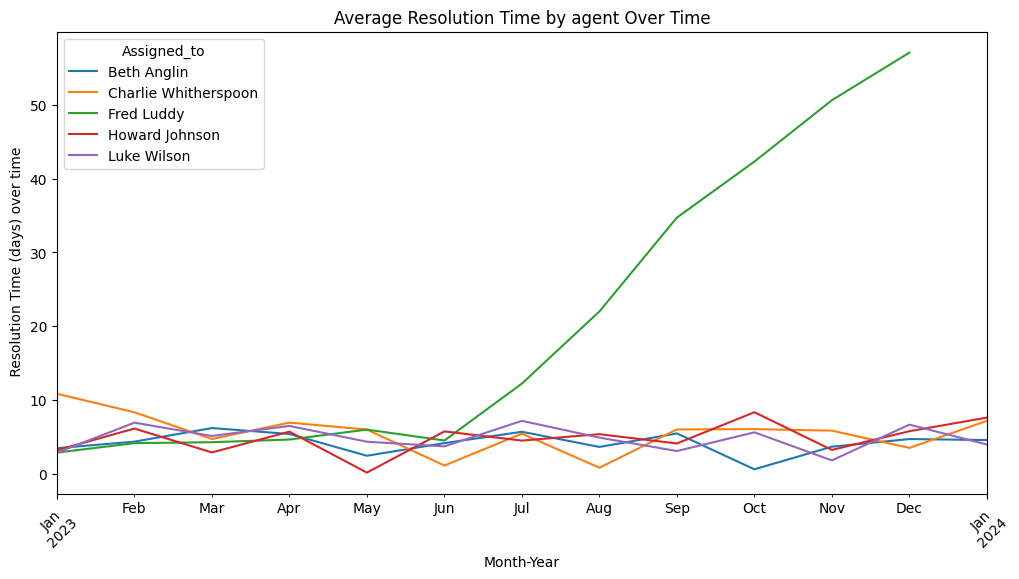

In [6]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert opened_at and closed_at to datetime
df["opened_at"] = pd.to_datetime(df["opened_at"])
df["closed_at"] = pd.to_datetime(df["closed_at"])

# Compute resolution time in days
df["resolution_time"] = (df["closed_at"] - df["opened_at"]).dt.total_seconds() / 86400

# Extract month-year from opened_at and create a new column
df["month_year"] = df["opened_at"].dt.to_period("M")

# Group by month_year and category, then compute average resolution time
df_grouped = (
    df.groupby(["month_year", "assigned_to"])["resolution_time"].mean().unstack()
)

# Plot the data
df_grouped.plot(kind="line", figsize=(12, 6))
plt.title("Average Resolution Time by agent Over Time")
plt.xlabel("Month-Year")
plt.ylabel(" Resolution Time (days) over time")
plt.xticks(rotation=45)
plt.legend(title="Assigned_to")
plt.show()

#### Generate JSON Description for the Insight

In [7]:
{
    "data_type": "descriptive",
    "insight": "Fred Luddy's TTR begins to increase linearly over time from a specific point of time (01-06-2023) compared to other agents who maintain a uniform TTR",
    "insight_value": {
        "x_val": "Time Period", 
        "y_val": "Increasing TTR Trend for Fred Luddy from June 2023 onwards"
    },
    "plot": {
        "plot_type": "line",
        "title": "Time to Resolution (TTR) Trend Comparison Among Agents",
        "x_axis": {
            "name": "Month-Year",
            "value": ["Jan-2023", "Feb-2023", "Mar-2023", "Apr-2023", "May-2023", "..."],
            "description": "This represents the timeline over which the TTR data is analyzed."
        },
        "y_axis": {
            "name": "Average Resolution Time (days)",
            "value": "line plot",  
            "description": "This represents the average time taken to resolve incidents, measured in days, across different agents."
        },
        "description": "The line plot shows the TTR trends for each agent over several months. While other agents' TTR remains relatively stable, Fred Luddy's TTR starts to increase linearly from a specific point in time. This divergence is clearly visible and raises concerns about factors influencing his performance."
    },
    "question": "How does the TTR of the specific agent compare to other agents during the same time frame?",
    "actionable_insight": "The observed linear increase in TTR for Fred Luddy suggests a potential issue that may be impacting his efficiency. It is advisable to investigate further into Fred Luddy's availability and workload, the complexity of the cases assigned, or any personal or systemic changes that occurred at the point when his TTR began to rise."
}

{'data_type': 'descriptive',
 'insight': "Fred Luddy's TTR begins to increase linearly over time from a specific point of time (01-06-2023) compared to other agents who maintain a uniform TTR",
 'insight_value': {'x_val': 'Time Period',
  'y_val': 'Increasing TTR Trend for Fred Luddy from June 2023 onwards'},
 'plot': {'plot_type': 'line',
  'title': 'Time to Resolution (TTR) Trend Comparison Among Agents',
  'x_axis': {'name': 'Month-Year',
   'value': ['Jan-2023',
    'Feb-2023',
    'Mar-2023',
    'Apr-2023',
    'May-2023',
    '...'],
   'description': 'This represents the timeline over which the TTR data is analyzed.'},
  'y_axis': {'name': 'Average Resolution Time (days)',
   'value': 'line plot',
   'description': 'This represents the average time taken to resolve incidents, measured in days, across different agents.'},
  'description': "The line plot shows the TTR trends for each agent over several months. While other agents' TTR remains relatively stable, Fred Luddy's TTR st

### **Question 3: What is the pattern in the number of incidents assigned to the specific agent over time?**

#### Plot number of incidents assigned per agent
This cell creates a bar plot to visualize the number of incidents assigned to each agent, providing insights into workload distribution and agent responsibility over the assessed period. This plot helps identify if certain agents are consistently assigned more incidents than others, which could indicate potential imbalances!!

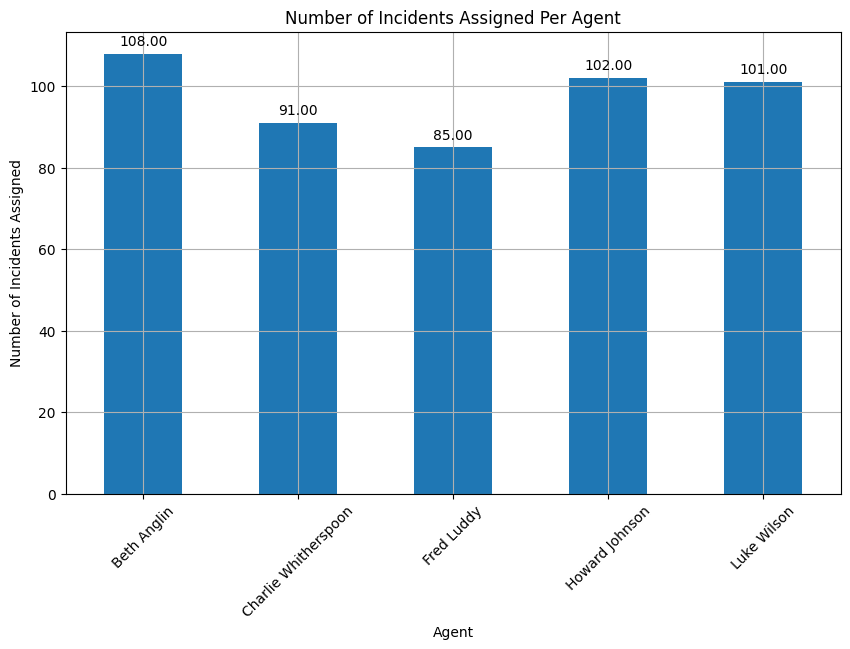

In [8]:
agent_incident_count = df.groupby('assigned_to')['number'].count()

# Plot the histogram
ax = agent_incident_count.plot(kind='bar', figsize=(10,6))

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.title('Number of Incidents Assigned Per Agent')
plt.xlabel('Agent')
plt.ylabel('Number of Incidents Assigned')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

#### Generate JSON Description for the Insight

In [9]:
{
    "data_type": "descriptive",
    "insight": "The number of incidents assigned to each agent, including Fred Luddy, remains uniform over time",
    "insight_value": {
        "x_val": "Agents", 
        "y_val": "Uniform Distribution of Incident Assignment"
    },
    "plot": {
        "plot_type": "histogram",
        "title": "Distribution of Incident Assignments Among Agents Over Time",
        "x_axis": {
            "name": "Agent",
            "value": ["Beth Anglin", "Charlie Whitherspoon", "Fred Luddy", "Howard Johnson", "Luke Wilson"],
            "description": "This represents the different agents handling incidents."
        },
        "y_axis": {
            "name": "Number of Incidents",
            "value": [108, 91, 85, 102, 101],  
            "description": "This represents the count of incidents assigned to each agent over the analyzed time period."
        },
        "description": "The histogram displays the number of incidents assigned to each agent over a specific time period. The distribution is relatively uniform across all agents, indicating that workload distribution in terms of number of incidents is even. This suggests that the increasing TTR for Fred Luddy is not due to an excessive number of assignments."
    },
    "question": "What is the pattern in the number of incidents assigned to the specific agent over time?",
    "actionable_insight": "Since the distribution of incident assignments is uniform among all agents, the prolonged TTR for Fred Luddy is unlikely to be caused by an overload of assignments. It may be beneficial to explore other factors such as the complexity of the incidents assigned to Fred, his working methods, or potential personal or systemic issues that might be affecting his performance. Monitoring the trend in the number of open tickets for each agent over time could also provide additional insights into workload management and efficiency."
}

{'data_type': 'descriptive',
 'insight': 'The number of incidents assigned to each agent, including Fred Luddy, remains uniform over time',
 'insight_value': {'x_val': 'Agents',
  'y_val': 'Uniform Distribution of Incident Assignment'},
 'plot': {'plot_type': 'histogram',
  'title': 'Distribution of Incident Assignments Among Agents Over Time',
  'x_axis': {'name': 'Agent',
   'value': ['Beth Anglin',
    'Charlie Whitherspoon',
    'Fred Luddy',
    'Howard Johnson',
    'Luke Wilson'],
   'description': 'This represents the different agents handling incidents.'},
  'y_axis': {'name': 'Number of Incidents',
   'value': [108, 91, 85, 102, 101],
   'description': 'This represents the count of incidents assigned to each agent over the analyzed time period.'},
  'description': 'The histogram displays the number of incidents assigned to each agent over a specific time period. The distribution is relatively uniform across all agents, indicating that workload distribution in terms of number 

### **Question 4: What is the pattern in the number of open incidents assigned to the specific agent over time?**

#### Plot number of open incidents over time for each agent.
This cell creates a line plot to visualize the number of open incidents assigned to each agent over the time. By examining open incidents per agent, the plot provides  insights into how efficiently incidents are being resolved and highlights any potential issues with case closures or workload management.


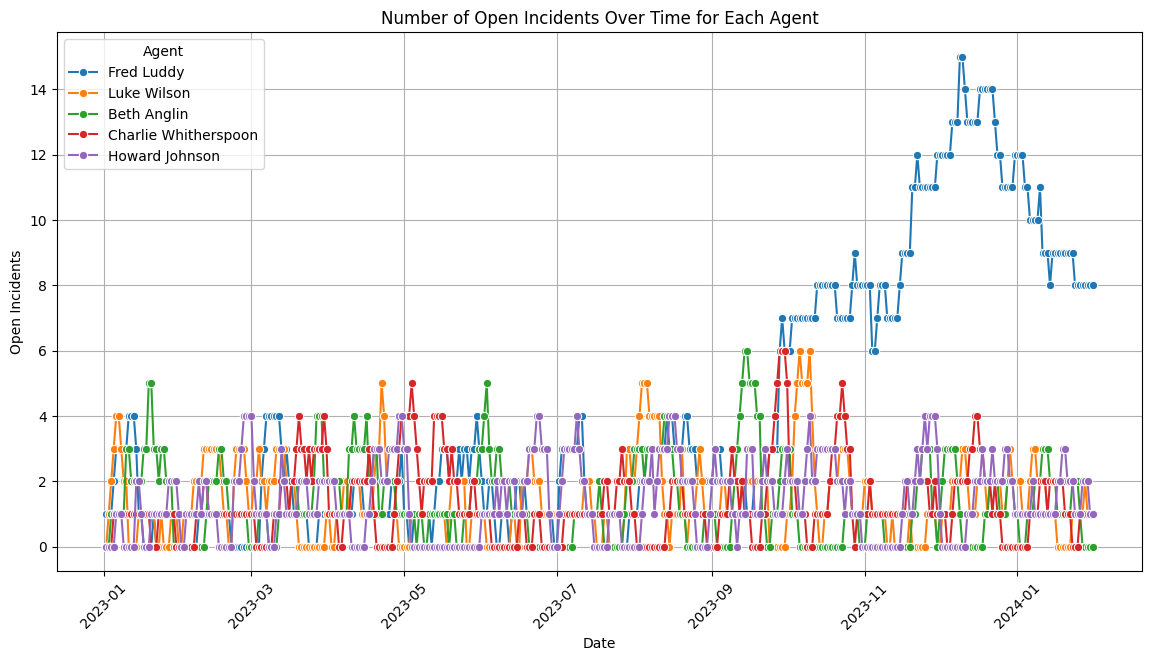

In [10]:
df['opened_at'] = pd.to_datetime(df['opened_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])
# Define the current date for the analysis, simulate up to the last 'opened_at' date
current_date = df['opened_at'].max()

# Create a range of dates from the start to the current date
date_range = pd.date_range(start=df['opened_at'].min(), end=current_date, freq='D')

# Function to count open incidents per date
def count_open_incidents(date, agent_data):
    # Incidents that are opened on or before 'date' and are not closed or closed after 'date'
    open_incidents = agent_data[(agent_data['opened_at'] <= date) & ((agent_data['closed_at'].isna()) | (agent_data['closed_at'] > date))]
    return len(open_incidents)

# Initialize a DataFrame to store the results
open_incidents_data = pd.DataFrame()

# Loop through each agent to calculate their open incidents over time
for agent in df['assigned_to'].unique():
    agent_data = df[df['assigned_to'] == agent]
    open_counts = [count_open_incidents(date, agent_data) for date in date_range]
    temp_df = pd.DataFrame({
        'Date': date_range,
        'Open Incidents': open_counts,
        'Agent': agent
    })
    open_incidents_data = pd.concat([open_incidents_data, temp_df], ignore_index=True)

# Plotting the data
plt.figure(figsize=(14, 7))
sns.lineplot(data=open_incidents_data, x='Date', y='Open Incidents', hue='Agent', marker='o')
plt.title('Number of Open Incidents Over Time for Each Agent')
plt.xlabel('Date')
plt.ylabel('Open Incidents')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Agent')
plt.show()

#### Generate JSON Description for the Insight

In [11]:
{
    "data_type": "diagnostic",
    "insight": "The number of open incidents for Fred Luddy is increasing over time, coinciding with the period where his TTR began to increase linearly",
    "insight_value": {
        "x_val": "Time Period", 
        "y_val": "Increasing Number of Open Incidents from june 2023 onwards for Fred Luddy"
    },
    "plot": {
        "plot_type": "line",
        "title": "Trend of Open Incidents for Fred Luddy Over Time",
        "x_axis": {
            "name": "Month-Year",
            "value": ["Jan-2023", "Feb-2023", "Mar-2023", "Apr-2023", "May-2023"],
            "description": "This represents the timeline over which the open incident data is analyzed."
        },
        "y_axis": {
            "name": "Number of Open Incidents",
            "description": "This represents the count of incidents still open and unresolved, assigned to Fred Luddy over the analyzed time period."
        },
        "description": "The line plot illustrates a clear increasing trend in the number of open incidents assigned to Fred Luddy, starting from a specific point in time. This increase aligns with the time when his TTR also begins to rise, suggesting a potential correlation between the growing backlog of open incidents and his prolonged resolution times."
    },
    "question": "What is the pattern in the number of open incidents assigned to the specific agent over time?",
    "actionable_insight": "The increasing trend in open incidents assigned to Fred Luddy warrants further investigation, particularly in relation to his leave periods. It is crucial to assess whether these open incidents are becoming more complex or if there are other factors at play during his leave that impact his ability to close cases efficiently. Addressing this increasing backlog by redistributing workload during peak times or providing additional support during his leave could help in managing the resolution times more effectively."
}

{'data_type': 'diagnostic',
 'insight': 'The number of open incidents for Fred Luddy is increasing over time, coinciding with the period where his TTR began to increase linearly',
 'insight_value': {'x_val': 'Time Period',
  'y_val': 'Increasing Number of Open Incidents from june 2023 onwards for Fred Luddy'},
 'plot': {'plot_type': 'line',
  'title': 'Trend of Open Incidents for Fred Luddy Over Time',
  'x_axis': {'name': 'Month-Year',
   'value': ['Jan-2023', 'Feb-2023', 'Mar-2023', 'Apr-2023', 'May-2023'],
   'description': 'This represents the timeline over which the open incident data is analyzed.'},
  'y_axis': {'name': 'Number of Open Incidents',
   'description': 'This represents the count of incidents still open and unresolved, assigned to Fred Luddy over the analyzed time period.'},
  'description': 'The line plot illustrates a clear increasing trend in the number of open incidents assigned to Fred Luddy, starting from a specific point in time. This increase aligns with the t

### **Question 5: What are the dates and duration of the agent’s leave (PTO)?**


#### Plot timeline of Fred Luddy's leave periods

This cell creates a visual timeline to display the periods of leave (PTO) taken by agent Fred Luddy, aiding in the analysis of how his absences might correlate with open incidents or resolution times. By plotting each leave period as a colored span on a timeline, this visualization provides a clear view of the distribution and duration of leave throughout the period covered by the data. The leave schedule for Fred Luddy is extracted from the sys_user table where it is stored in a serialized format.

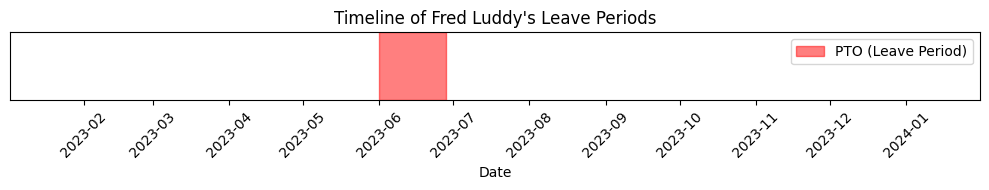

In [12]:
fred_schedule = df_usr[df_usr['name'] == 'Fred Luddy']['schedule'].iloc[0]
fred_schedule = eval(fred_schedule)
import matplotlib.dates as mdates

# Assuming df is already defined and has 'opened_at' and 'closed_at' columns converted to datetime
df['opened_at'] = pd.to_datetime(df['opened_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])

# Define the current date for the analysis, simulate up to the last 'opened_at' date
current_date = df['opened_at'].max()
# Create a range of dates from the start to the current date
date_range = pd.date_range(start=df['opened_at'].min(), end=current_date, freq='D')

# Fred's PTO schedule as list of tuples with start and end dates
pto_schedule = fred_schedule

# Plotting
fig, ax = plt.subplots(figsize=(10, 2))  # Adjust the figure size as needed

# Plot each leave period as a rectangle
for start, end in pto_schedule:
    ax.axvspan(start, end, color='red', alpha=0.5, label='PTO (Leave Period)')

# Set limits, labels, title and legend
ax.set_xlim([date_range.min(), date_range.max()])
ax.set_ylim(0, 1)  # Static Y limits as we are only plotting periods
ax.set_yticks([])  # Hide Y axis ticks
ax.set_xlabel('Date')
ax.set_title('Timeline of Fred Luddy\'s Leave Periods')
ax.legend(loc='upper right')

# Formatting the x-axis to make it more readable
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Generate JSON Description for the Insight

In [13]:
{
    "data_type": "diagnostic",
    "insight": "Fred Luddy's increasing TTR correlates with his PTO period",
    "insight_value": {
        "x_val": "PTO Period",
        "y_val": "Increase in TTR"
    },
    "plot": {
        "plot_type": "timeline",
        "title": "Timeline of Fred Luddy's Leave Periods and TTR Correlation",
        "x_axis": {
            "name": "Date",
            "value": ["2023-01-01", "2023-12-31"],
            "description": "This represents the timeline over which Fred Luddy's PTO and TTR data is analyzed."
        },
        "y_axis": {
            "name": "Leave Indicator",
            "value": [0, 1], 
            "description": "This axis indicates the presence of a leave period. The value is binary, where a visible bar indicates a leave period."
        },
        "description": "The plot uses shaded red areas to visually represent the periods when Fred Luddy was on PTO. These periods are shown over a timeline that spans the current analysis period. The timeline illustrates that the increase in TTR for Fred Luddy begins to rise linearly at the onset of his first leave period and remains elevated. This visualization helps in identifying a potential correlation between his leave periods and the observed increase in TTR."
    },
    "question": "What are the dates and duration of the agent’s leave (PTO)?",
    "actionable_insight": "Given the correlation between Fred Luddy's PTO periods and the increase in his TTR, it is crucial to plan for adequate coverage or support during his future leaves. This could involve redistributing his workload more effectively among other team members or providing temporary additional resources to manage the increased load. Such proactive measures could help mitigate the impact of his absence on overall service resolution times and maintain consistent performance across the team."
}

{'data_type': 'diagnostic',
 'insight': "Fred Luddy's increasing TTR correlates with his PTO period",
 'insight_value': {'x_val': 'PTO Period', 'y_val': 'Increase in TTR'},
 'plot': {'plot_type': 'timeline',
  'title': "Timeline of Fred Luddy's Leave Periods and TTR Correlation",
  'x_axis': {'name': 'Date',
   'value': ['2023-01-01', '2023-12-31'],
   'description': "This represents the timeline over which Fred Luddy's PTO and TTR data is analyzed."},
  'y_axis': {'name': 'Leave Indicator',
   'value': [0, 1],
   'description': 'This axis indicates the presence of a leave period. The value is binary, where a visible bar indicates a leave period.'},
  'description': 'The plot uses shaded red areas to visually represent the periods when Fred Luddy was on PTO. These periods are shown over a timeline that spans the current analysis period. The timeline illustrates that the increase in TTR for Fred Luddy begins to rise linearly at the onset of his first leave period and remains elevated. T

### **Question-6:** What are the  consequences of not addressing the anomaly or trend of increasing TTR during Fred Luddy's leave periods?

### Plot projected increase in TTR for Fred Luddy
This cell utilizes linear regression to predict future trends in Time to Resolution (TTR) specifically during periods when Fred Luddy is on leave. The analysis aims to highlight the potential consequences of not addressing the increasing TTR trend that coincides with his absences. 

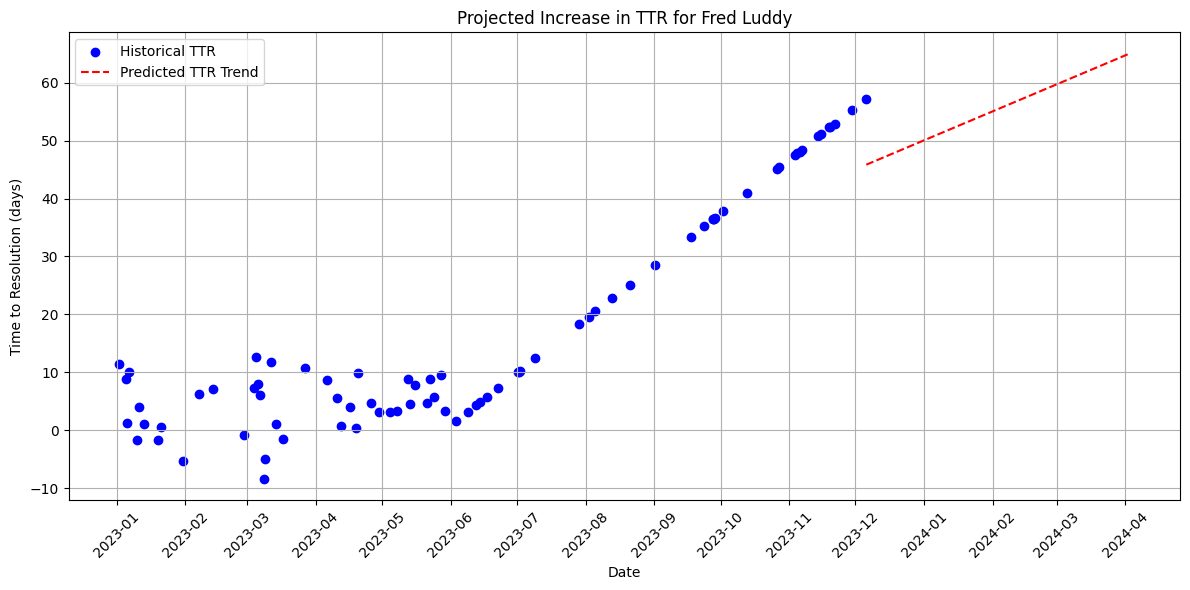

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

# Load data
dataset_path = "csvs/flag-14.csv"
df = pd.read_csv(dataset_path)
df = df[df['assigned_to'] == 'Fred Luddy']
df['opened_at'] = pd.to_datetime(df['opened_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])

# Compute resolution time in days
df["resolution_time"] = (df["closed_at"] - df["opened_at"]).dt.total_seconds() / 86400
# Remove rows with NaN values in 'resolution_time'
df = df.dropna(subset=['resolution_time'])
# Convert dates to ordinal for regression analysis
df['date_ordinal'] = df['opened_at'].apply(lambda x: x.toordinal())

# Prepare data for linear regression
X = df['date_ordinal'].values.reshape(-1, 1)  # Reshape for sklearn
y = df['resolution_time'].values  # Target variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict future values
future_dates = pd.date_range(start=df['opened_at'].max(), periods=120, freq='D')  # 4 months into the future
future_dates_ordinal = [d.toordinal() for d in future_dates]
future_preds = model.predict(np.array(future_dates_ordinal).reshape(-1, 1))

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(df['opened_at'], df['resolution_time'], color='blue', label='Historical TTR')
plt.plot(future_dates, future_preds, color='red', linestyle='--', label='Predicted TTR Trend')
plt.title('Projected Increase in TTR for Fred Luddy')
plt.xlabel('Date')
plt.ylabel('Time to Resolution (days)')
plt.legend()
plt.grid(True)

# Formatting the x-axis to make it more readable
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Generate JSON Description for the Insight

In [15]:

{
    "data_type": "predictive",
    "insight": "There is a continued linear increase in TTR if workload during leave periods is not balanced",
    "insight_value": {
        "trend": "Linear Increase",
        "prediction": "Continued escalation in resolution times"
    },
    "description": "The analysis of Fred Luddy's TTR shows a clear linear increase that coincides with his periods of leave. Without intervention, this trend is predicted to continue, leading to progressively longer resolution times for incidents assigned to him. This ongoing increase in TTR could potentially result in decreased customer satisfaction, increased stress on other team members who may need to compensate informally, and a general decline in team performance.",
    "recommendation": {
        "action": "Implement workload balancing strategies during leave periods",
        "expected_outcome": "Stabilization of TTR and maintenance of service quality",
        "urgency": "High"
    },
    "actionable_insight": "To prevent the predicted escalation in TTR, it is essential to implement strategic workload balancing during Fred Luddy's leave periods. This could involve redistributing his responsibilities among team members or hiring temporary staff. Additionally, ensuring that all agents are equally trained to handle the types of incidents typically assigned to Fred could mitigate the risk of increased TTR. Proactive measures are crucial to maintain consistent performance levels and uphold customer satisfaction."
}

{'data_type': 'predictive',
 'insight': 'There is a continued linear increase in TTR if workload during leave periods is not balanced',
 'insight_value': {'trend': 'Linear Increase',
  'prediction': 'Continued escalation in resolution times'},
 'description': "The analysis of Fred Luddy's TTR shows a clear linear increase that coincides with his periods of leave. Without intervention, this trend is predicted to continue, leading to progressively longer resolution times for incidents assigned to him. This ongoing increase in TTR could potentially result in decreased customer satisfaction, increased stress on other team members who may need to compensate informally, and a general decline in team performance.",
 'recommendation': {'action': 'Implement workload balancing strategies during leave periods',
  'expected_outcome': 'Stabilization of TTR and maintenance of service quality',
  'urgency': 'High'},
 'actionable_insight': "To prevent the predicted escalation in TTR, it is essential t

### Summary of Findings (Flag 14):

1. **Trend in Resolution Time**: Analysis reveals that Fred Luddy's time to resolution (TTR) begins to increase linearly from a certain point, suggesting potential personal or systemic challenges impacting his performance.
   ß
2. **Correlation with Open Incidents**: The increase in TTR coincides with a rise in the number of open incidents assigned to Fred Luddy. 
   
3. **Correlation with LEave Schedule**: This pattern is likely exacerbated by periods of his leave of absence, during which unresolved incidents accumulate.
   
4. **Strategic Workload Management**: Addressing these trends is crucial, especially during employee absences, to prevent workload imbalances and ensure consistent performance across the team. Implementing strategic workload balancing could mitigate the impact of such absences and maintain operational efficiency.